In [1]:
import numpy as np
from matplotlib import pyplot as plt
from plotly import express as px
from simulation import Simulation1
%load_ext autoreload
%autoreload 2

In [2]:
sim = Simulation1()
df = sim.run()

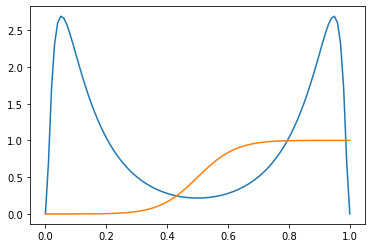

In [ ]:
zz = np.linspace(0, 1, 100)
plt.plot(zz, sim.pz(zz), label='p(z)')
plt.plot(zz, sim.py_given_z(zz), label='p(y=1|z)')

In [ ]:
z, y = sim.generate_data(1000)
x = sim.f_inv(z)
px.histogram(x, color=y)

In [ ]:
from calibration import OracleCalibrator, BinnedOracleCalibrator, HistogramCalibrator, IsotonicCalibrator, PlattCalibrator
h_hist = HistogramCalibrator(n_bins=10, strategy='uniform').fit(z, y)
h_iso = IsotonicCalibrator().fit(z, y)
h_platt = PlattCalibrator().fit(z, y)

binned = BinnedOracleCalibrator(bins=h_hist.bins, py_given_z=sim.py_given_z, pz=sim.pz)
oracle = OracleCalibrator(py_given_z=sim.py_given_z)

<AxesSubplot:xlabel='Predicted Probability', ylabel='Empirical Frequency'>

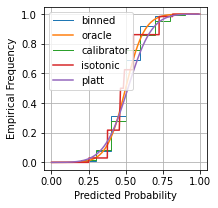

In [ ]:
binned.plot(label='binned')
oracle.plot(label='oracle')
h_hist.plot(label='calibrator')
h_iso.plot(label='isotonic')
h_platt.plot(label='platt', set_layout=True)

In [ ]:
df

,cal,sha,ref,risk,bs,n,B,i
0,1.179429e-03,3.534171e-03,0.00251,0.004714,0.007224,100,6,0
1,2.162325e-03,1.804147e-02,0.00251,0.020204,0.022714,100,6,1
2,2.611213e-03,2.849727e-02,0.00251,0.031108,0.033619,100,6,2
3,1.237385e-02,2.494212e-03,0.00251,0.014868,0.017378,100,11,0
4,2.222918e-03,1.519738e-02,0.00251,0.017420,0.019931,100,11,1
...,...,...,...,...,...,...,...,...
205,8.913842e-07,2.875376e-06,0.00251,0.000004,0.002514,10000000,569,1
206,8.034285e-07,2.909824e-06,0.00251,0.000004,0.002514,10000000,569,2
207,1.870977e-06,1.020945e-06,0.00251,0.000003,0.002513,10000000,1000,0
208,1.436479e-06,1.040472e-06,0.00251,0.000002,0.002513,10000000,1000,1


cal vs. B 0.790689764996003
cal vs. n -0.9880598759291346
sha vs. B -1.8296774049612332


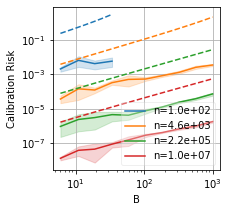

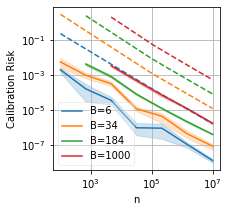

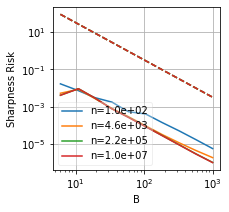

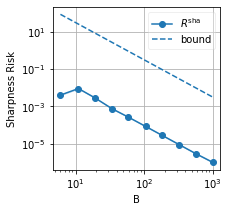

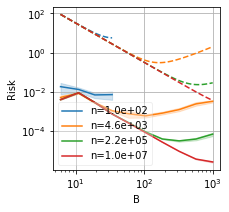

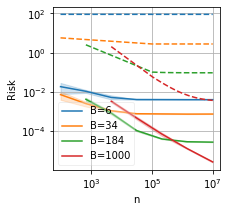

<Figure size 216x216 with 0 Axes>

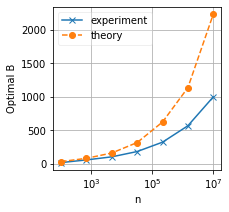

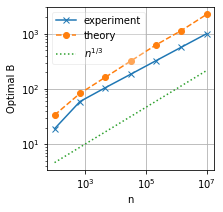

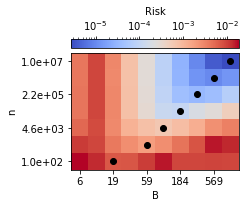

In [ ]:
sim.plot(df)